In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('Poly_final.shp')

In [18]:
gdf1 = gpd.read_file('Point_final.shp')
gdf2 = gpd.read_file('Nogeom_final.shp')

In [19]:
gdf_ls = [gdf, gdf1, gdf2]

In [20]:
gdf3 = pd.concat(gdf_ls)

In [ ]:
yp = sns.displot(data=gdf3, x='STATUS_YR', height=5, aspect=2)
yp.set(xlim=(1950, None))

In [79]:
df2 = gdf3[['WDPAID','CONTINENT','STATUS_YR', 'MARINE', 'IUCN_CAT', 'OWN_TYPE', 'GIS_AREA', 'DESIG_TYPE', 'GOV_TYPE',
          'MANG_AUTH', 'VERIF', 'REGION']]
df2.head(1)

,WDPAID,CONTINENT,STATUS_YR,MARINE,IUCN_CAT,OWN_TYPE,GIS_AREA,DESIG_TYPE,GOV_TYPE,MANG_AUTH,VERIF,REGION
0,555555520,Africa,2007,0,Not Reported,Not Reported,3812.709416,National,Indigenous peoples,Community,Not Reported,Sub-Saharan Africa


In [ ]:
ax = sns.countplot(df2['CONTINENT'])
ax.bar_label(ax.containers[0])

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(df2['IUCN_CAT'])
ax.bar_label(ax.containers[0])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a mapping dictionary
category_mapping = {
    'Federal or national ministry or agency': 'Type A',
    'Sub-national ministry or agency': 'Type A',
    'Government-delegated management': 'Type A',
    'Collaborative governance': 'Type B',
    'Transboundary governance': 'Type B',
    'Joint governance': 'Type B',
    'Individual landowners': 'Type C',
    'Non-profit organisations': 'Type C',
    'For-profit organisations': 'Type C',
    'Indigenous peoples': 'Type D',
    'Local communities': 'Type D',
    'Not Reported': 'Not Reported'  # Add a default category if needed
}

# Map the categories to their main types
df2['Main_Type'] = df2['GOV_TYPE'].map(category_mapping)

plt.figure(figsize=(10, 5))
ax = sns.countplot(df2['Main_Type'], order=order)
ax.bar_label(ax.containers[0])  # Add labels to the bars

# Rotate x-axis labels diagonally
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))

ax = sns.countplot(df2['MARINE'])

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Set x-axis labels
marine_labels = ['Terrestrial PAs', 'Coastal PAs', 'Marine PAs']
ax.set_xticklabels(marine_labels)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unique values from your 'GOV_TYPE' column
unique_values = ['Indigenous peoples', 'Not Reported',
                 'Federal or national ministry or agency',
                 'Sub-national ministry or agency', 'Non-profit organisations',
                 'Local communities', 'Individual landowners',
                 'Government-delegated management', 'Collaborative governance',
                 'For-profit organisations', 'Joint governance', 'Transboundary governance']

# Define color groups based on the categories you provided
color_groups = {
    'Type A Governance by government': ['Federal or national ministry or agency', 'Sub-national ministry or agency', 'Government-delegated management'],
    'Type B Shared governance': ['Transboundary governance', 'Collaborative governance', 'Joint governance'],
    'Type C Private governance': ['Individual landowners', 'Non-profit organisations', 'For-profit organisations'],
    'Type D Governance by indigenous people and local communities': ['Indigenous peoples', 'Local communities']
}

# Create a mapping of unique values to color based on the color groups
color_mapping = {}
for group, values in color_groups.items():
    for value in values:
        color_mapping[value] = color_palette[group]

# Use a default color for values not in color_mapping
default_color = 'gray'

plt.figure(figsize=(10, 8))

# Use the palette parameter to assign colors based on 'GOV_TYPE'
ax = sns.countplot(x='GOV_TYPE', data=df2, palette=[color_mapping.get(value, default_color) for value in unique_values])

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Rotate x-axis labels diagonally
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=group, markerfacecolor=color, markersize=10) for group, color in color_palette.items()]
ax.legend(handles=legend_labels, title='GOV_TYPE Group')

# Show the plot
plt.show()


In [49]:
unique_values = df2['GOV_TYPE'].unique()
print(unique_values)

['Indigenous peoples' 'Not Reported'
 'Federal or national ministry or agency'
 'Sub-national ministry or agency' 'Non-profit organisations'
 'Local communities' 'Individual landowners'
 'Government-delegated management' 'Collaborative governance'
 'For-profit organisations' 'Joint governance' 'Transboundary governance']


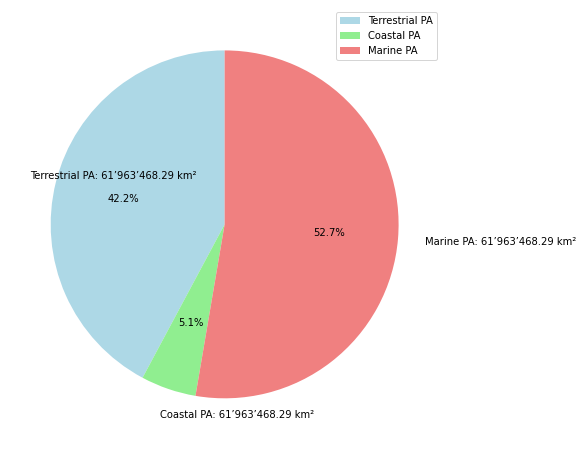

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import locale

# Set the locale to use commas as thousand separators
locale.setlocale(locale.LC_NUMERIC, '')

# Assuming gdf['MARINE'] contains values 0, 1, and 2
legend_labels = {
    0: 'Terrestrial PA',
    1: 'Coastal PA',
    2: 'Marine PA'
}

# Calculate the sum of GIS_AREA for each MARINE category
sum_area_by_marine = gdf.groupby('MARINE')['GIS_AREA'].sum()

# Plotting the pie chart without labels
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sum_area_by_marine,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'lightcoral']
)

# Add legend
plt.legend([legend_labels[mar] for mar in sum_area_by_marine.index], loc='upper right')

# Calculate total sum
total_sum = sum_area_by_marine.sum()

# Add labels outside the pie chart with the label 'km^2' for each slice
for wedge, text, autotext, label in zip(wedges, texts, autotexts, sum_area_by_marine.index):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    radius = 1.05  # Adjust this value to control the distance of labels from the center
    x = radius * 1.1 * np.cos(np.deg2rad(angle))
    y = radius * 1.1 * np.sin(np.deg2rad(angle))
    formatted_sum = locale.format_string('%1.2f', total_sum, grouping=True)
    plt.text(x, y, f'{legend_labels[label]}: {formatted_sum} km²',
             ha='left', va='center', fontsize=10)

# Show the plot
plt.show()


In [80]:
# set the index and transpose
dft = df2.set_index('WDPAID').T

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the line chart
sns.lineplot(x='STATUS_YR', y='WDPAID', data=dft)

# Set title and labels
plt.title('Line Chart of Values Over Years')
plt.xlabel('Year')
plt.ylabel('Value Count')

# Show the plot
plt.show()